In [1]:
import pandas as pd
import numpy as np

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
# Load the data
df = pd.read_excel('Online_Retail.xlsx')

In [8]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Clean and prepare the data
#In the "Clean and prepare the data" step, the code df = df[~df['InvoiceNo'].str.startswith('C')] filters out the canceled transactions from the dataset.
#In the Online Retail dataset, the 'InvoiceNo' column contains a unique identifier for each transaction. If the transaction was canceled, the invoice number starts with the letter "C". To remove canceled transactions from the dataset, the code uses the string method startswith() to check if the 'InvoiceNo' column starts with the letter "C". The tilde (~) operator is used to invert the resulting boolean mask, which returns True for rows where the 'InvoiceNo' does not start with "C".
#So, the resulting DataFrame df only includes rows where the 'InvoiceNo' does not start with "C", which effectively removes all canceled transactions from the dataset"

df = df.dropna()
# Filter out rows where 'InvoiceNo' column starts with 'C' and handle null values
df = df[~(df['InvoiceNo'].str.startswith('C') | df['InvoiceNo'].isnull())]

#the code df['Description'] = df['Description'].str.strip() removes any leading or trailing white space from the 'Description' column 
df['Description'] = df['Description'].str.strip()

#creates a transactional dataset suitable for Market Basket Analysis from the cleaned and preprocessed DataFrame 
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

In [14]:
basket.head(200)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536754,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
newBasket =  basket.select_dtypes(include='bool')

In [16]:
# Calculate item frequencies
frequent_itemsets = apriori(newBasket, min_support=0.01, use_colnames=True)

In [19]:
basket[basket > 0] = 1
basket = basket.astype(bool)
#This code replaces all values greater than 0 in basket with 1, and then converts the resulting dataset to a Boolean format 

In [20]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

In [21]:
frequent_itemsets.head()

,support,itemsets
0,0.013056,(10 COLOUR SPACEBOY PEN)
1,0.010088,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.014890,(12 PENCIL SMALL TUBE WOODLAND)
3,0.016562,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.015699,(12 PENCILS SMALL TUBE SKULL)


In [22]:
# Generate association rules
#The association_rules() function in the mlxtend library is used to generate association rules from a set of frequent itemsets.
#The function takes as input a DataFrame of frequent itemsets and a metric for evaluating the quality of the association rules.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [23]:
# Evaluate association rules
rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

In [24]:
# Interpret and visualize results
print(rules.head())

                          antecedents                        consequents   
0   (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)  \
10      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
16   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   
18   (ALARM CLOCK BAKELIKE CHOCOLATE)         (ALARM CLOCK BAKELIKE RED)   
20       (ALARM CLOCK BAKELIKE IVORY)       (ALARM CLOCK BAKELIKE GREEN)   

    antecedent support  consequent support   support  confidence       lift   
0             0.019098            0.055514  0.010196    0.533898   9.617433  \
10            0.035445            0.055514  0.017803    0.502283   9.047930   
16            0.017372            0.042566  0.011329    0.652174  15.321541   
18            0.017372            0.047313  0.012192    0.701863  14.834366   
20            0.025248            0.042566  0.014836    0.587607  13.804665   

    leverage  conviction  zhangs_metric  
0   0.009136    2.026353  

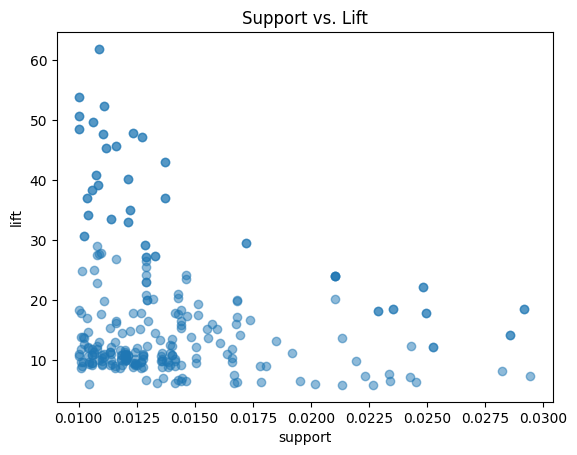

In [25]:
#Scatter plot of support and lift:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs. Lift')
plt.show()

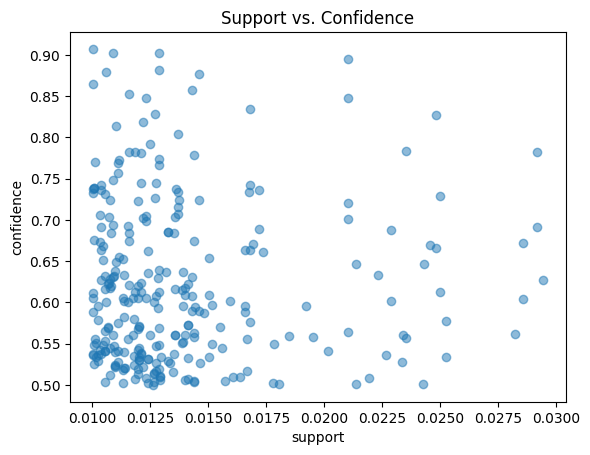

In [26]:
#Scatter plot of support and confidence:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs. Confidence')
plt.show()

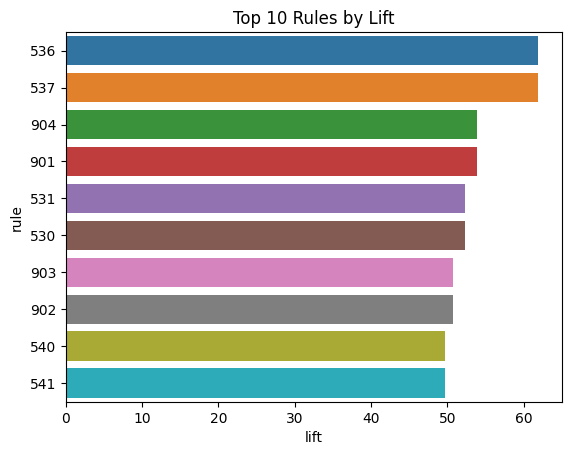

In [29]:
#Bar chart of top 10 rules by lift:
import seaborn as sns

top_rules = rules.sort_values(by='lift', ascending=False).head(10)
sns.barplot(x='lift', y=top_rules.index.map(str), data=top_rules)
plt.xlabel('lift')
plt.ylabel('rule')
plt.title('Top 10 Rules by Lift')
plt.show()